## APS PYTHON PARA CIÊNCIA DE DADOS
Alexandre Wever

Arthur Tamm

Tomás Alessi

Victória de Oliveira Farias


Base de dados : Adult Census Income

Link : https://www.kaggle.com/datasets/uciml/adult-census-income 

O conjunto de dados escolhido para analise é o **Adult Census Income**, amplamente utilizado em estudos e competições de aprendizado de máquina. Ele contém informações demográficas e ocupacionais de adultos nos Estados Unidos, extraídas do Censo de 1994. Cada registro representa um indivíduo, com variáveis como idade, escolaridade, ocupação, horas trabalhadas por semana e outras características socioeconômicas.  

O objetivo principal da análise é **compreender os fatores que influenciam a faixa de renda** de um indivíduo, buscando identificar padrões e relações entre as variáveis. O relatório será desenvolvido integrando explicações teóricas, código executável, visualizações e interpretações. 

In [21]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [22]:
df = pd.read_csv("adult.csv")
print(df.shape[0], "linhas e", df.shape[1], "colunas")
df.head()

32561 linhas e 15 colunas


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


O dataset contém informações demográficas e de emprego de adultos nos EUA, com o objetivo de prever se o indivíduo ganha mais de 50 mil dólares anuais (income).

Principais colunas:

age – idade

workclass – tipo de emprego

education – nível de escolaridade

marital-status – estado civil

occupation – ocupação

relationship – relação familiar

race, sex – dados demográficos

hours-per-week – horas trabalhadas por semana

native-country – país de origem

income – variável alvo (<=50K ou >50K)

In [24]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [25]:
df.isna().sum()
# Verificacao de valores nulos

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [26]:
df.replace('?', np.nan, inplace=True)
df.isna().sum()
# substitui valores '?' por nulos e refaz a contagem


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [37]:
df.groupby('income').agg({'age':['mean'], 'hours.per.week':['mean'], 'education.num':['mean']})

,age,hours.per.week,education.num
,mean,mean,mean
income,,,
<=50K,36.783738,38.840210,9.595065
>50K,44.249841,45.473026,11.611657


Realizando um agrupamento por faixa de renda, podemos observar as médias de idade, horas trabalhadas por semana e nível educacional para cada categoria de renda (separação feita entre mais de 50 mil dólares e 50 mil dólares ou menos). Observa-se que indivíduos com renda superior a 50 mil dólares tendem a ser mais velhos, trabalhar mais horas por semana e possuir um nível educacional mais elevado em comparação com aqueles que ganham 50 mil dólares ou menos.

In [38]:
df.groupby(['income', 'race']).size().reset_index(name='count')


,income,race,count
0,<=50K,Amer-Indian-Eskimo,275
1,<=50K,Asian-Pac-Islander,763
2,<=50K,Black,2737
3,<=50K,Other,246
4,<=50K,White,20699
5,>50K,Amer-Indian-Eskimo,36
6,>50K,Asian-Pac-Islander,276
7,>50K,Black,387
8,>50K,Other,25
9,>50K,White,7117


In [39]:
df.groupby(['income', 'sex']).size().reset_index(name='count')


,income,sex,count
0,<=50K,Female,9592
1,<=50K,Male,15128
2,>50K,Female,1179
3,>50K,Male,6662


Oberva-se que não há uma discrepância significativa na distribuição de renda variando o sexo, mas há uma diferença notável quando se considera a raça. Indivíduos de determinadas raças apresentam uma maior proporção de renda superior a 50 mil dólares anuais em comparação com outras raças. Essa análise sugere que fatores demográficos, como raça, podem influenciar a distribuição de renda dentro do conjunto de dados.

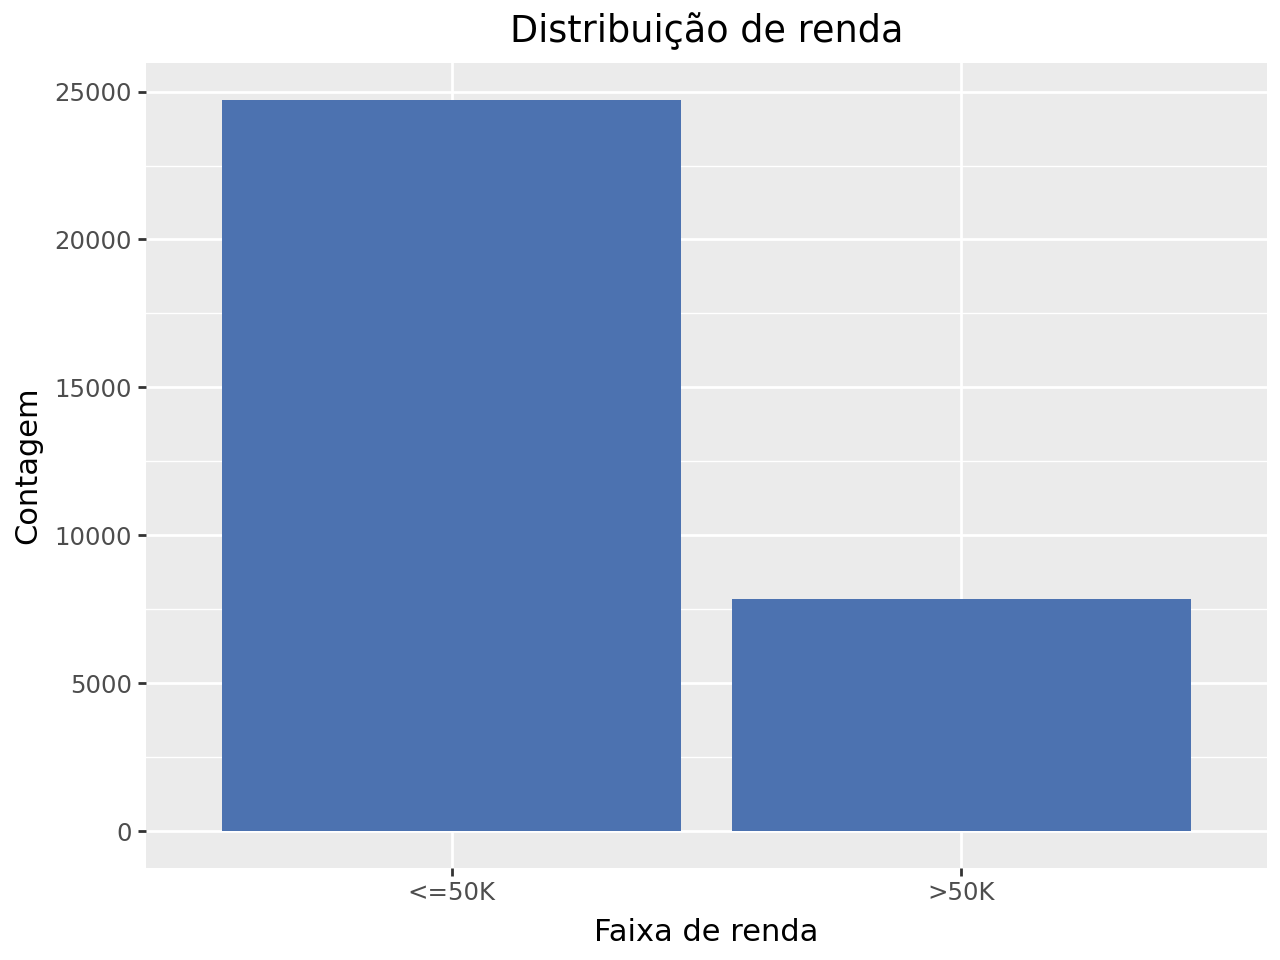

In [ ]:
(ggplot(df, aes(x='income')) +
 geom_bar(fill='#4C72B0') +
 labs(title='Distribuição de renda', x='Faixa de renda', y='Contagem'))

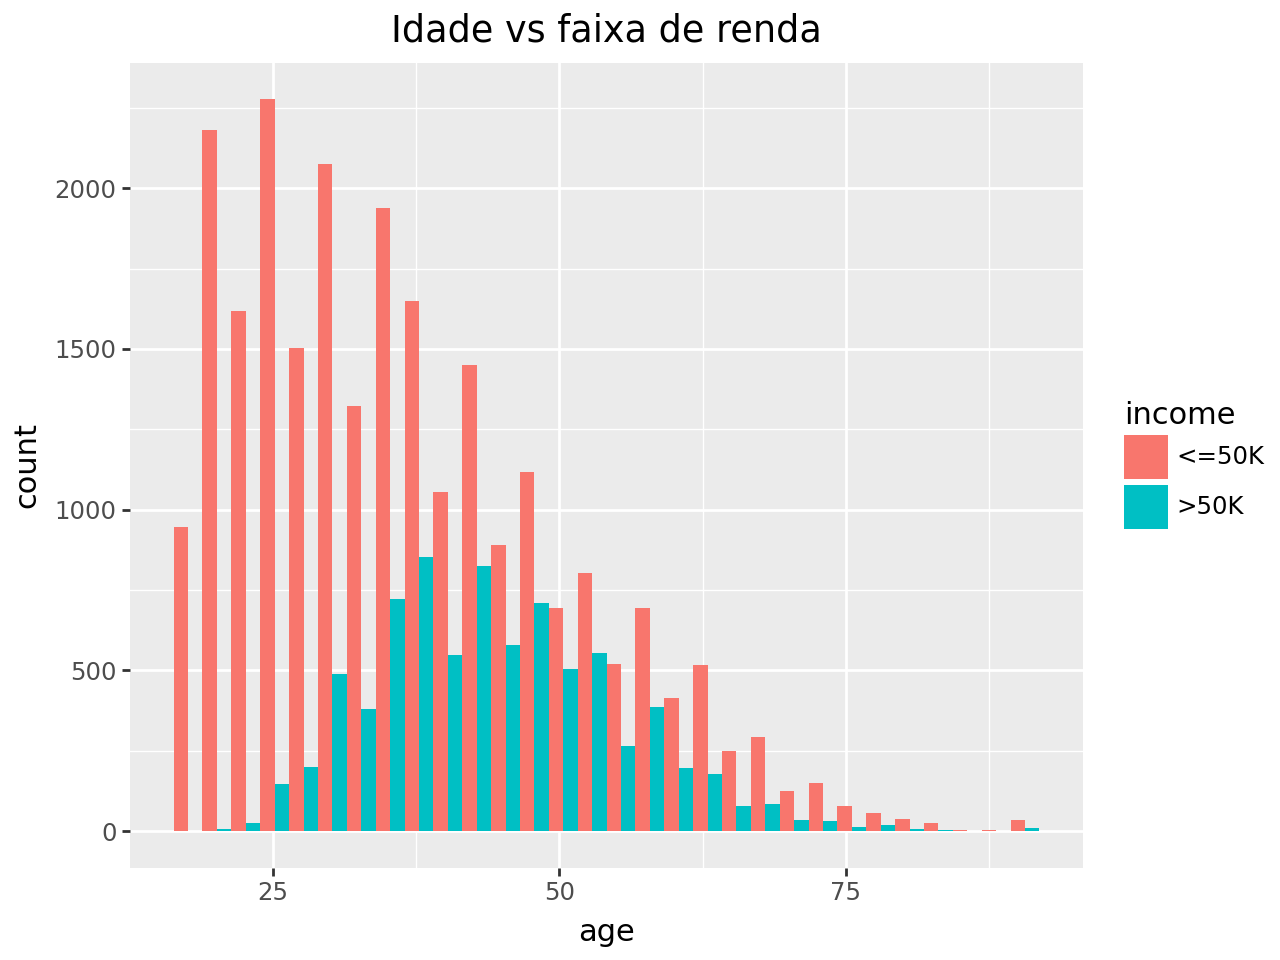

In [ ]:
(ggplot(df, aes(x='age', fill='income')) +
 geom_histogram(bins=30, position='dodge') +
 labs(title='Idade vs faixa de renda'))

A partir do primeiro gráfico, observa-se que a maioria dos indivíduos do conjunto de dados pertence à faixa de renda de até 50 mil dólares anuais, o que indica um de classes, comum em dados socioeconômicos.

O segundo gráfico mostra a distribuição da idade em relação à faixa de renda. Nota-se que a concentração de indivíduos é maior entre **25 e 45 anos**, faixa etária em que há predominância de pessoas com renda menor que 50 mil dólares. Entretanto, à medida que a idade aumenta, a proporção de indivíduos com renda superior a 50 mil dólares cresce, alcançando um pico por volta dos **40 a 50 anos**.  

A partir dos 60 anos, observa-se uma queda significativa na contagem de registros, o que pode estar relacionado à aposentadoria ou redução da quantidade de trabalho.  

Essas evidências sugerem que a idade está associada à renda até certo ponto, e que essa relação pode não ser linear.
